<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EXPOSICION/Arbol_de_decision_de_regresion_luis_diethmar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de datos

##  IMPORTAR LIBRERIAS

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [9]:
# Leer el dataset 'creditcard.csv' en un DataFrame de pandas
df = pd.read_csv('stores_sales_forecasting.csv', encoding='latin1')

# Mostrar las primeras 5 filas del DataFrame para una vista previa
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [10]:
# Ver la información general del DataFrame, incluyendo tipos de datos y valores no nulos
df.info()

# Contar el número de valores nulos en cada columna
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [11]:
# Conversión
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['DayOfWeek'] = df['Order Date'].dt.day_name()

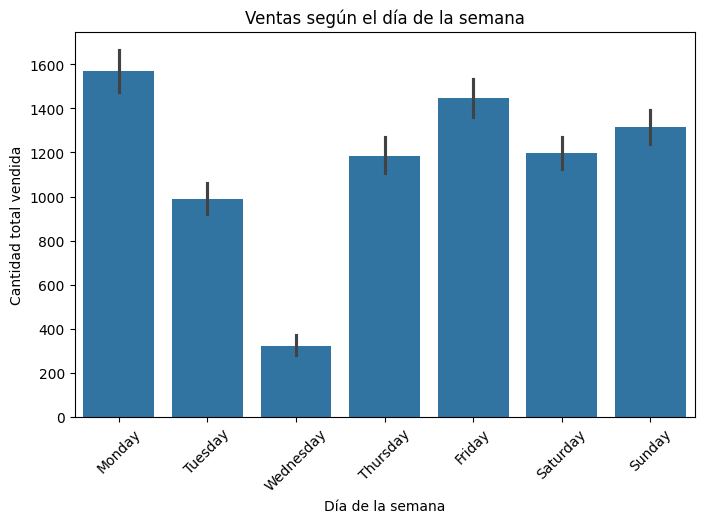

In [12]:
# Análisis
plt.figure(figsize=(8,5))
sns.barplot(x='DayOfWeek', y='Quantity', data=df, estimator=np.sum, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ventas según el día de la semana')
plt.ylabel('Cantidad total vendida')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.show()

# PREPARACION DE DATOS

In [13]:
#
X = df[['Sales', 'Discount', 'Profit', 'Year', 'Month', 'DayOfWeek', 'Region', 'Category', 'Sub-Category']]
y = df['Quantity']
X = pd.get_dummies(X, drop_first=True)

In [14]:
# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## CONSTRUCCCION Y ENTRENAMIENTO DEL ARBOL DE DECISION

In [15]:
# Crear el modelo con una profundidad máxima para que no sea muy complejo
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=5, random_state=42)

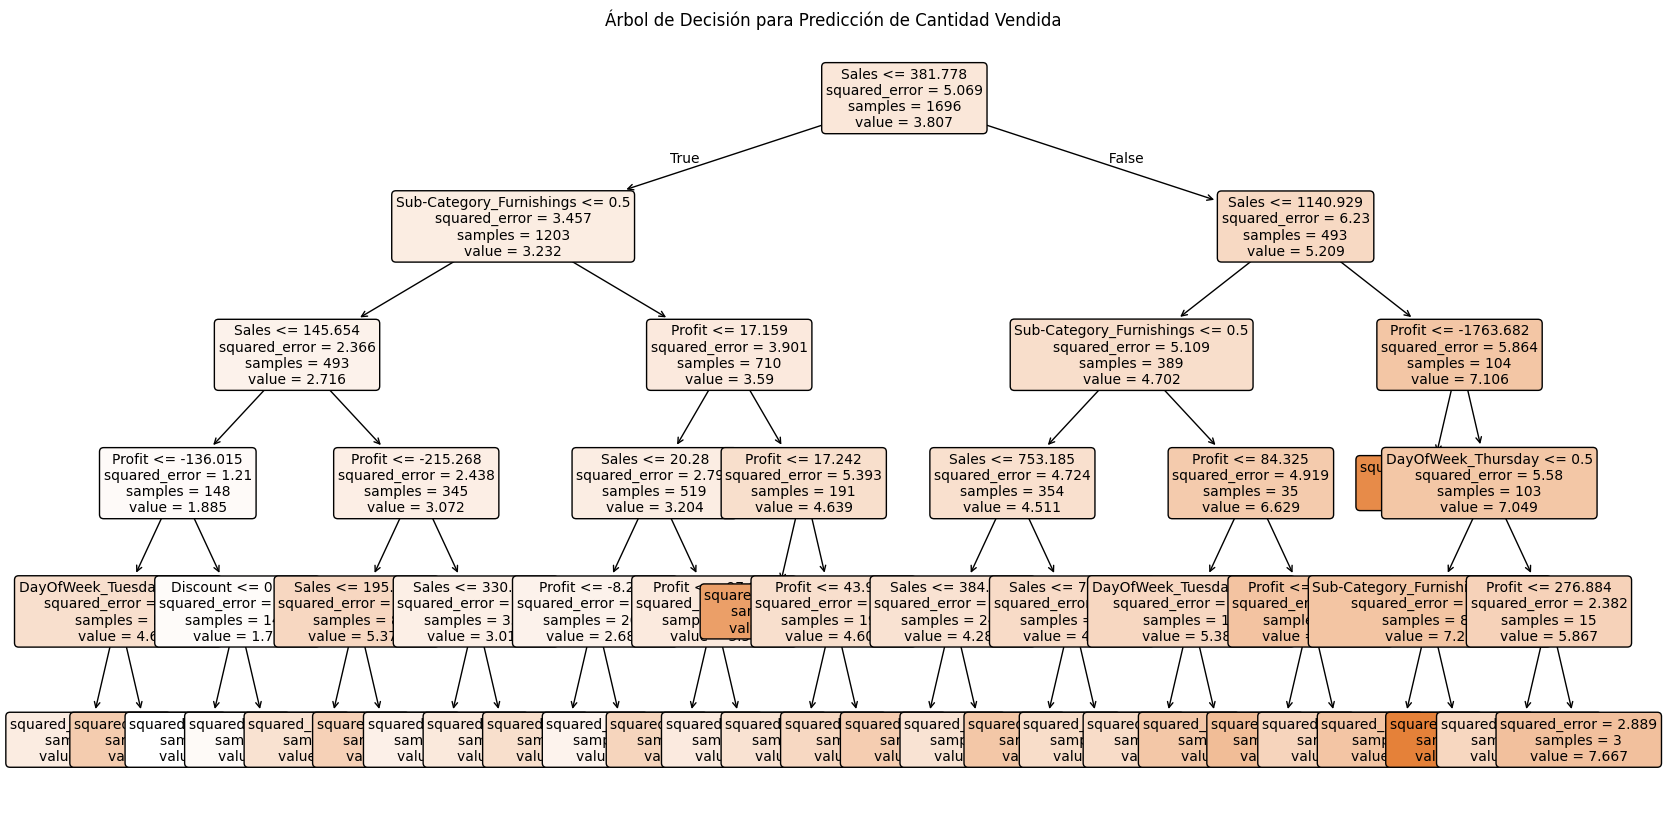

In [16]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title('Árbol de Decisión para Predicción de Cantidad Vendida')
plt.show()
